In [36]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
from tqdm import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
from keras.utils import to_categorical
from keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

TRAIN_DIR = 'dataset/train/'
TEST_DIR = 'dataset/test/'

In [37]:
def load_dataset(directory):
    image_paths = []
    labels = []
    
    for label in os.listdir(directory):
        for filename in os.listdir(directory+label):
            image_path = os.path.join(directory, label, filename)
            image_paths.append(image_path)
            labels.append(label)
            
        print(label, "Completed")
    
    return image_paths, labels

In [38]:
train = pd.DataFrame()
train['image'], train['label'] = load_dataset(TRAIN_DIR)
# перемешиваем
train = train.sample(frac=1).reset_index(drop=True)
train.head()

angry Completed
disgust Completed
fear Completed
happy Completed
neutral Completed
sad Completed
surprise Completed


,image,label
0,dataset/train/happy\Training_43950203.jpg,happy
1,dataset/train/happy\Training_42245688.jpg,happy
2,dataset/train/sad\Training_72615912.jpg,sad
3,dataset/train/happy\Training_65946872.jpg,happy
4,dataset/train/happy\Training_75656269.jpg,happy


In [39]:
test = pd.DataFrame()
test['image'], test['label'] = load_dataset(TEST_DIR)
test.head()

angry Completed
disgust Completed
fear Completed
happy Completed
neutral Completed
sad Completed
surprise Completed


,image,label
0,dataset/test/angry\PrivateTest_10131363.jpg,angry
1,dataset/test/angry\PrivateTest_10304478.jpg,angry
2,dataset/test/angry\PrivateTest_1054527.jpg,angry
3,dataset/test/angry\PrivateTest_10590091.jpg,angry
4,dataset/test/angry\PrivateTest_1109992.jpg,angry


<Axes: xlabel='label', ylabel='count'>

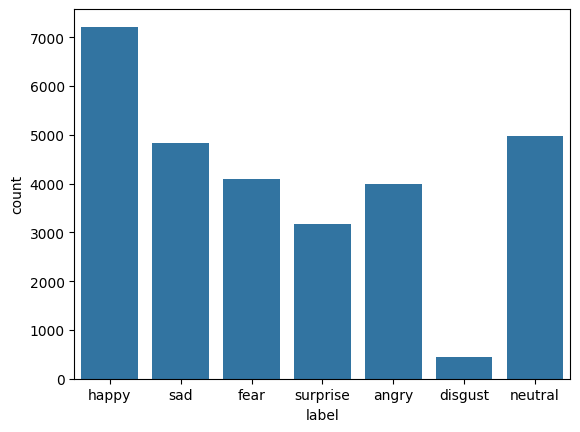

In [40]:
sns.countplot(x=train['label'])

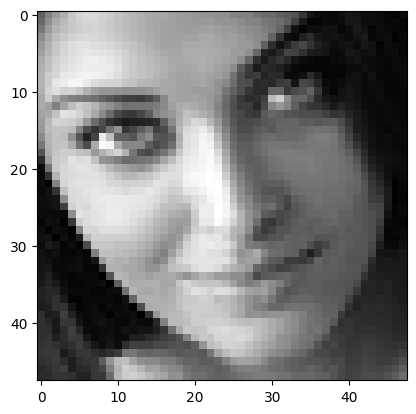

In [41]:
from PIL import Image
img = Image.open(train['image'][22])
plt.imshow(img, cmap='gray');

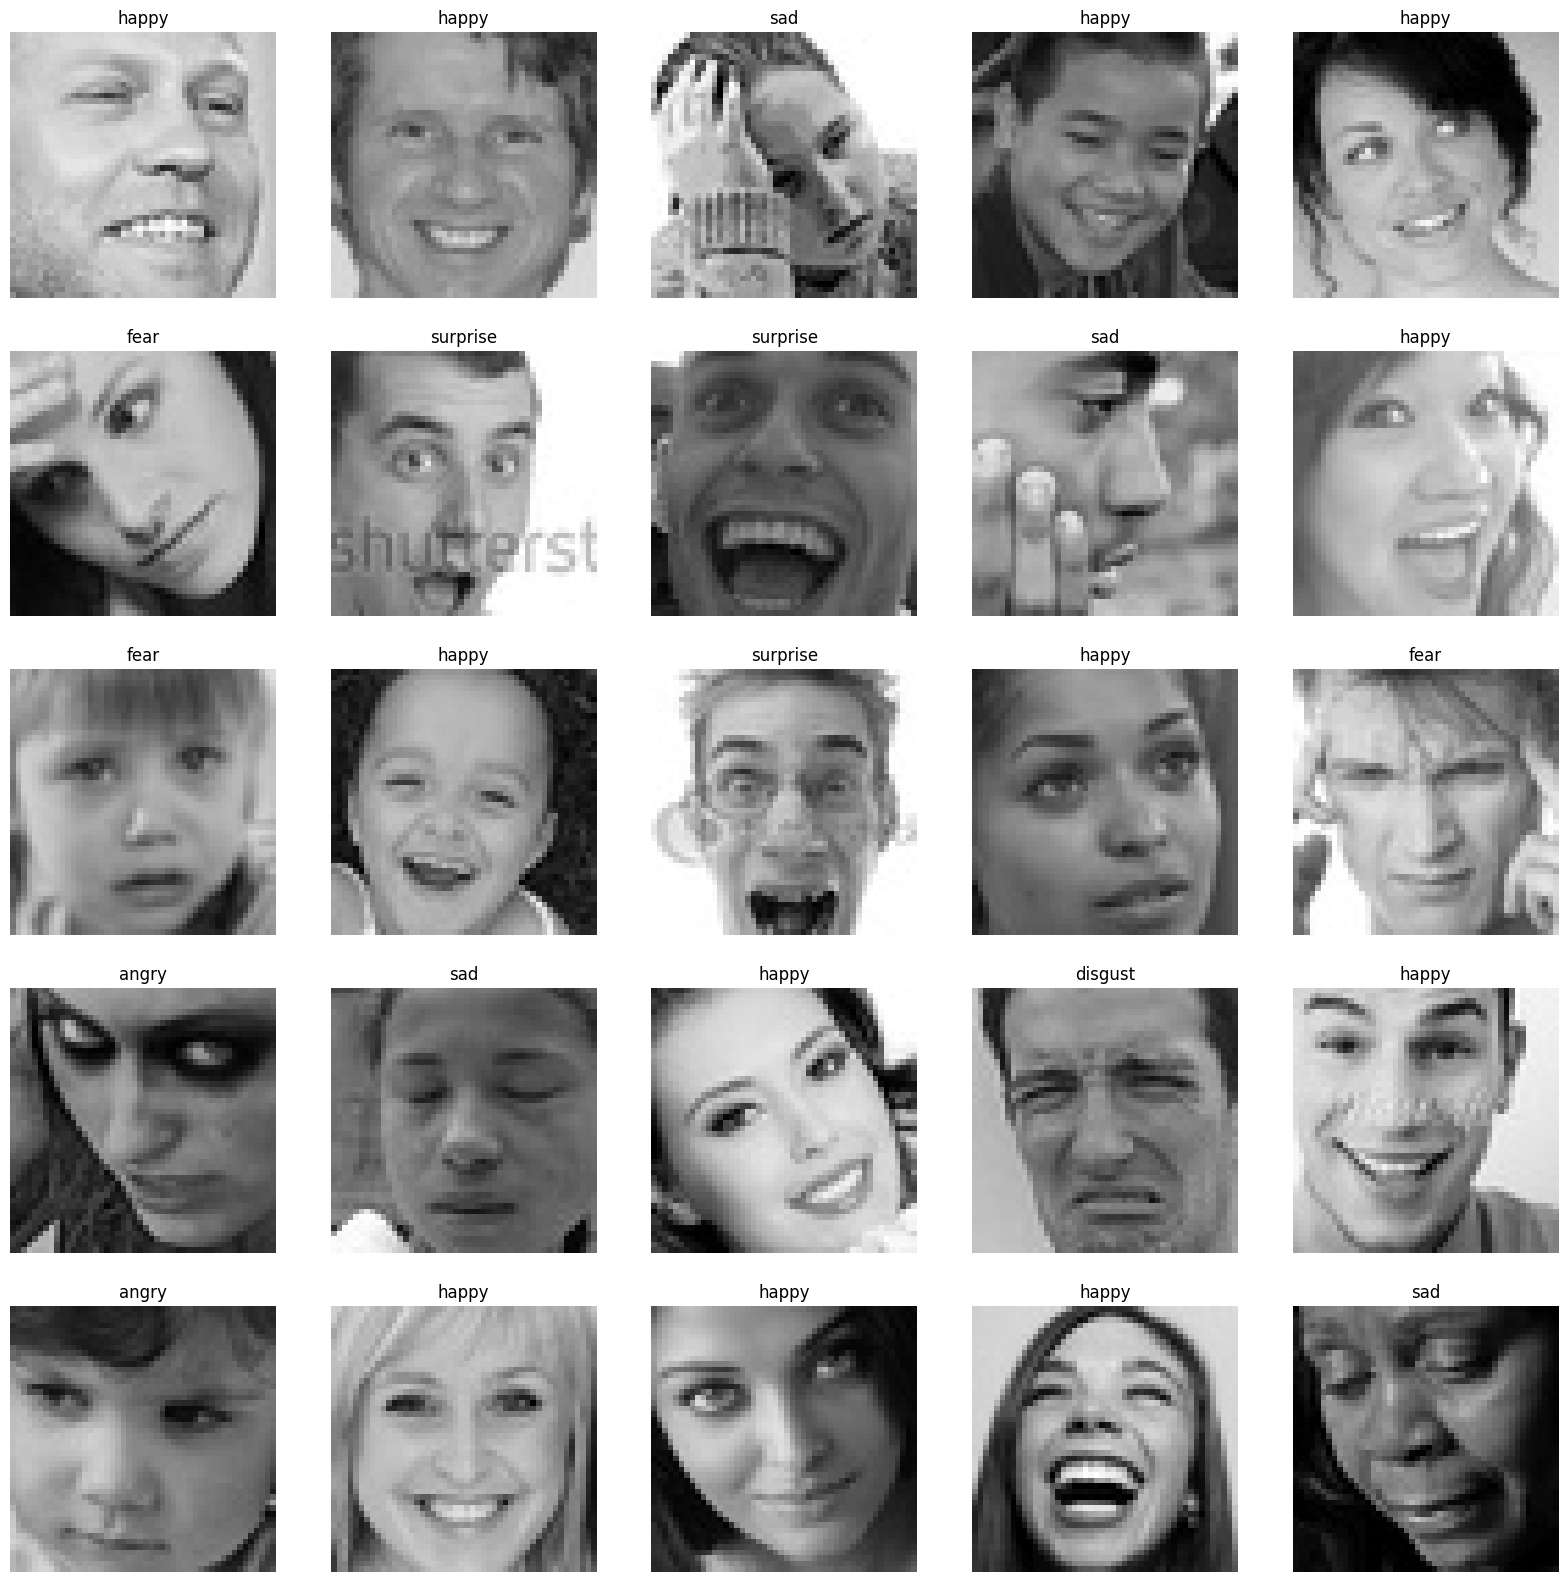

In [42]:
# показываем изображения
plt.figure(figsize=(20,20))
files = train.iloc[0:25]

for index, file, label in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')

In [43]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, grayscale=True)
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features

In [44]:
train_features = extract_features(train['image'])

100%|██████████| 28709/28709 [00:05<00:00, 5392.93it/s]


In [45]:
test_features = extract_features(test['image'])

100%|██████████| 7178/7178 [00:01<00:00, 5391.84it/s]


In [46]:
## нормализация
x_train = train_features/255.0
x_test = test_features/255.0

In [47]:
## обработка признаков
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train['label'])
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

Exception ignored in: <function tqdm.__del__ at 0x000001E6EC35ECA0>
Traceback (most recent call last):
  File "c:\Work\KURS4\venv\lib\site-packages\tqdm\std.py", line 1149, in __del__
    self.close()
  File "c:\Work\KURS4\venv\lib\site-packages\tqdm\notebook.py", line 278, in close
    self.disp(bar_style='danger', check_delay=False)
AttributeError: 'tqdm_notebook' object has no attribute 'disp'


In [48]:
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7) 

In [50]:
# config
input_shape = (48, 48, 1)
output_class = 7

In [51]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(output_class, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

In [52]:
# train модели
history = model.fit(x=x_train, y=y_train, batch_size=128, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100


225/225 [==============================] - 126s 552ms/step - loss: 1.8199 - accuracy: 0.2488 - val_loss: 1.8005 - val_accuracy: 0.2478
Epoch 2/100
225/225 [==============================] - 127s 564ms/step - loss: 1.7804 - accuracy: 0.2571 - val_loss: 1.7048 - val_accuracy: 0.2948
Epoch 3/100
225/225 [==============================] - 128s 568ms/step - loss: 1.7009 - accuracy: 0.3067 - val_loss: 1.5996 - val_accuracy: 0.3682
Epoch 4/100
225/225 [==============================] - 127s 566ms/step - loss: 1.6002 - accuracy: 0.3726 - val_loss: 1.4786 - val_accuracy: 0.4220
Epoch 5/100
225/225 [==============================] - 126s 560ms/step - loss: 1.5144 - accuracy: 0.4138 - val_loss: 1.3900 - val_accuracy: 0.4627
Epoch 6/100
225/225 [==============================] - 126s 560ms/step - loss: 1.4525 - accuracy: 0.4351 - val_loss: 1.3485 - val_accuracy: 0.4765
Epoch 7/100
225/225 [==============================] - 125s 557ms/step - loss: 1.4154 - accuracy: 0.4554 - val_loss:

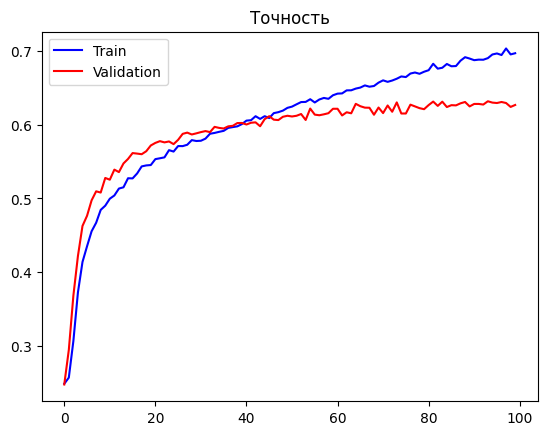

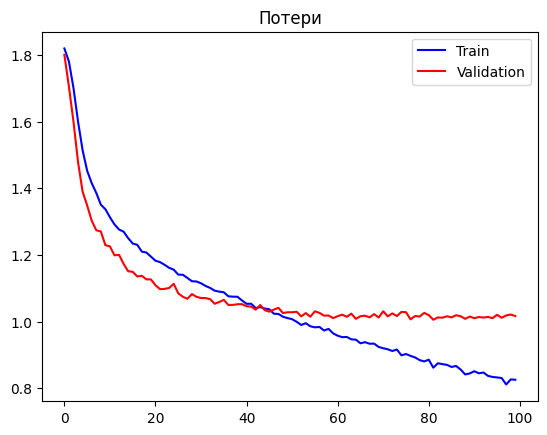

In [54]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Train')
plt.plot(epochs, val_acc, 'r', label='Validation')
plt.title('Точность')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, loss, 'b', label='Train')
plt.plot(epochs, val_loss, 'r', label='Validation')
plt.title('Потери')
plt.legend()

plt.show()

Original Output: sad
1/1 [==============================] - 0s 36ms/step
Predicted Output: sad


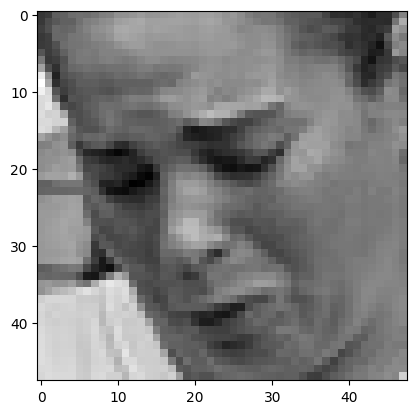

In [56]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

тест

In [69]:
VALID_DIR = 'C:\\Work\\test_set2\\'
valid = pd.DataFrame()
valid['image'], valid['label'] = load_dataset(VALID_DIR)
valid.head()

angry Completed
disgust Completed
fear Completed
happy Completed
neutral Completed
sad Completed
surprise Completed


,image,label
0,C:\Work\test_set2\angry\11647173796_033ff06112...,angry
1,C:\Work\test_set2\angry\1379351899_7cfa2b0dc4_...,angry
2,C:\Work\test_set2\angry\14187801814_ea89208940...,angry
3,C:\Work\test_set2\angry\22600236939_54d0e01905...,angry
4,C:\Work\test_set2\angry\22721287949_65572bea8b...,angry


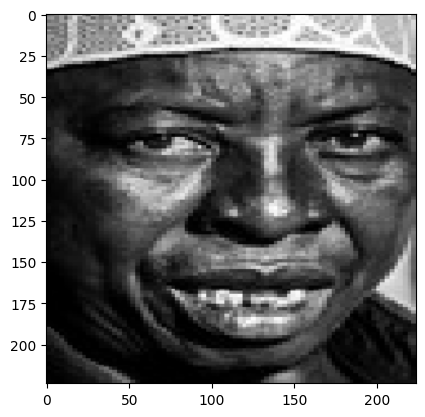

In [70]:
img346 = Image.open(valid['image'][0])
plt.imshow(img346, cmap='gray');

In [71]:
from tqdm import tqdm
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import array_to_img
import numpy as np

def extract_features2(images, target_size=(48, 48)):
    features = []
    for image in tqdm(images):
        img = load_img(image, grayscale=True, target_size=target_size)
        img_array = img_to_array(img)
        features.append(img_array)
    features = np.array(features)
    features = features.reshape(len(features), target_size[0], target_size[1], 1)

    return features



valid_features = extract_features2(valid['image'])

100%|██████████| 5350/5350 [00:02<00:00, 2211.13it/s]


In [72]:
x_validat = valid_features/255.0

In [73]:
Le = LabelEncoder()
Le.fit(valid['label'])
y_validat = Le.transform(valid['label'])
y_validat = to_categorical(y_validat, num_classes=7)

y_validat

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

Original Output: sad
1/1 [==============================] - 0s 25ms/step
Predicted Output: sad


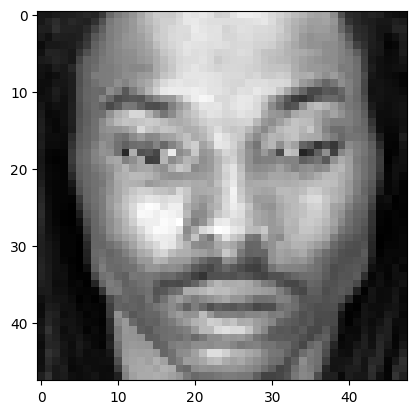

In [78]:
image_index = random.randint(0, len(valid))
print("Original Output:", valid['label'][image_index])

pred = model.predict(x_validat[image_index].reshape(1, 48, 48, 1))
prediction_label = Le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

In [79]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# листы для хранения
true_labels = []
predicted_labels = []

for image_index in range(len(x_validat)):
    # Настоящее значение
    true_label = valid['label'].iloc[image_index]
    true_labels.append(true_label)
    # Предсказанное
    pred = model.predict(x_validat[image_index].reshape(1, 48, 48, 1))
    prediction_label = Le.inverse_transform([pred.argmax()])[0]
    predicted_labels.append(prediction_label)
    if image_index == random.randint(0, len(x_validat) - 1):
        print("Original Output:", true_label)
        print("Predicted Output:", prediction_label)
        plt.imshow(x_validat[image_index].reshape(48, 48), cmap='gray')
        plt.show()

# Метрики
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


1/1 [==============================] - 0s 24ms/step
Accuracy: 0.47233644859813084
Precision: 0.5074788976964442
Recall: 0.47233644859813084
F1 Score: 0.43493942440896743


видео

In [80]:
def preprocess_image(image_path, target_size=(48, 48)):
    img = load_img(image_path, grayscale=True, target_size=target_size)
    img_array = img_to_array(img)
    img_array = img_array.reshape(1, *img_array.shape)
    return img_array

In [81]:
import os
df2 = pd.DataFrame({'Эмоция': [],'Файл': []})
folder_path = 'C:\\Work\\Mask'
for image_filename in os.listdir(folder_path):
    if image_filename.endswith(".jpg"):
        image_path = os.path.join(folder_path, image_filename)
        preprocessed_image = preprocess_image(image_path)
        predictions = model.predict(preprocessed_image)
        predicted_label = Le.inverse_transform([predictions.argmax()])[0]
        print(f"Image: {image_filename}, Predicted Label: {predicted_label}")
        df_new_row = pd.DataFrame({'Эмоция': [predicted_label],'Файл':[image_path]})
        df2 = pd.concat([df2, df_new_row], ignore_index=True)

df2.head()


1/1 [==============================] - 0s 25ms/step
Image: frame_with_face_10.jpg, Predicted Label: sad
1/1 [==============================] - 0s 24ms/step
Image: frame_with_face_100.jpg, Predicted Label: sad
1/1 [==============================] - 0s 25ms/step
Image: frame_with_face_101.jpg, Predicted Label: sad
1/1 [==============================] - 0s 25ms/step
Image: frame_with_face_102.jpg, Predicted Label: sad
1/1 [==============================] - 0s 23ms/step
Image: frame_with_face_103.jpg, Predicted Label: sad
1/1 [==============================] - 0s 25ms/step
Image: frame_with_face_104.jpg, Predicted Label: sad
1/1 [==============================] - 0s 23ms/step
Image: frame_with_face_105.jpg, Predicted Label: sad
1/1 [==============================] - 0s 25ms/step
Image: frame_with_face_106.jpg, Predicted Label: sad
1/1 [==============================] - 0s 33ms/step
Image: frame_with_face_107.jpg, Predicted Label: sad
1/1 [==============================] - 0s 26ms/step
Imag

,Эмоция,Файл
0,sad,C:\Work\Mask\frame_with_face_10.jpg
1,sad,C:\Work\Mask\frame_with_face_100.jpg
2,sad,C:\Work\Mask\frame_with_face_101.jpg
3,sad,C:\Work\Mask\frame_with_face_102.jpg
4,sad,C:\Work\Mask\frame_with_face_103.jpg


In [89]:
df2

,Эмоция,Файл
0,sad,C:\Work\Mask\frame_with_face_10.jpg
1,sad,C:\Work\Mask\frame_with_face_100.jpg
2,sad,C:\Work\Mask\frame_with_face_101.jpg
3,sad,C:\Work\Mask\frame_with_face_102.jpg
4,sad,C:\Work\Mask\frame_with_face_103.jpg
...,...,...
383,sad,C:\Work\Mask\frame_with_face_94.jpg
384,sad,C:\Work\Mask\frame_with_face_95.jpg
385,fear,C:\Work\Mask\frame_with_face_96.jpg
386,sad,C:\Work\Mask\frame_with_face_98.jpg


In [88]:
df2.to_csv('df2.csv', index=False,sep=';')

Для графика используем graphic.py файл